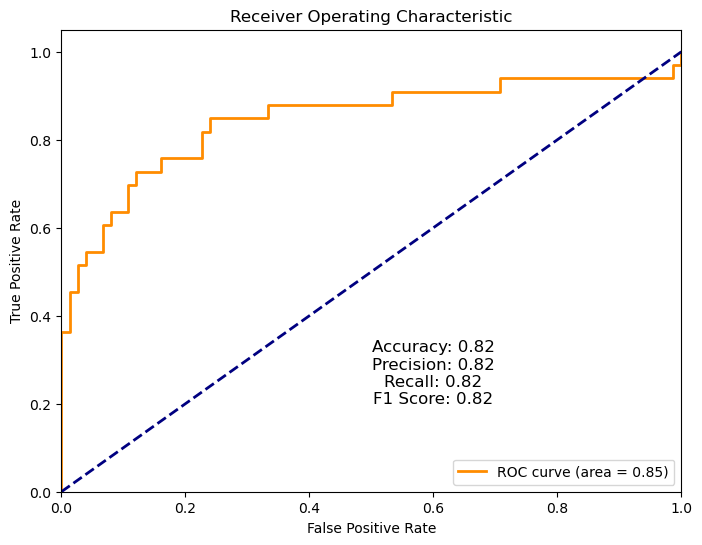

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        75
           1       0.77      0.61      0.68        33

    accuracy                           0.82       108
   macro avg       0.81      0.76      0.78       108
weighted avg       0.82      0.82      0.82       108

Confusion Matrix:
[[69  6]
 [13 20]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pandas as pd


data = pd.read_csv('/Users/mehtap/Downloads/PCOS_data.csv')


X = data.iloc[:, 3:-1]  
y = data['PCOS (Y/N)']


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = np.mean(y_test == y_pred)

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

y_scores = svm_classifier.decision_function(X_test)


fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.text(0.6, 0.2, 'Accuracy: {:.2f}\nPrecision: {:.2f}\nRecall: {:.2f}\nF1 Score: {:.2f}'.format(accuracy, precision, recall, f1_score),
         fontsize=12, ha='center')

plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ROC AUC (Test): 0.926948051948052

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.85      0.69      0.76        32

    accuracy                           0.87       109
   macro avg       0.86      0.82      0.84       109
weighted avg       0.87      0.87      0.87       109


Confusion Matrix (Test):
[[73  4]
 [10 22]]


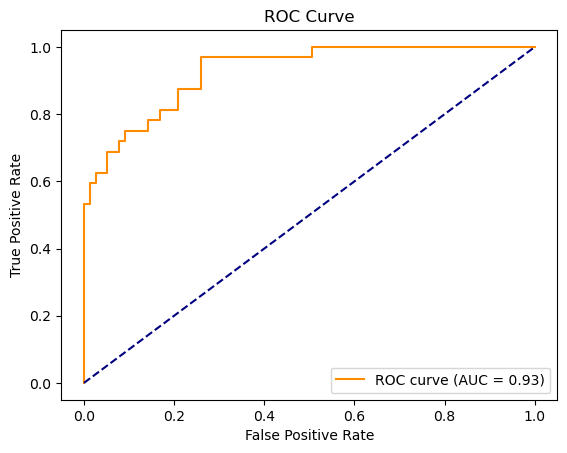

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Load the data
data = pd.read_excel('/Users/mehtap/Downloads/05.xlsx')

# Strip whitespaces from columns
data.columns = data.columns.str.strip()

# Convert all columns except 'PCOS' to numeric (handling '1.99.' -> '1.99')
def clean_numeric(x):
    if isinstance(x, str):
        x = x.strip().replace('.', '', 1) if x.count('.') > 1 else x
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

for col in data.columns:
    if col != 'PCOS':
        data[col] = data[col].apply(clean_numeric)

# Separate features and target
X_raw = data.drop(columns=['PCOS'])
y = data['PCOS']

# Imputation for missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_raw)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Train SVM
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svm_classifier.predict(X_train_scaled)
y_test_pred = svm_classifier.predict(X_test_scaled)

# Probabilities for ROC AUC
y_test_proba = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# ROC AUC on test set
roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC AUC (Test):", roc_auc)

# Metrics on Test Set
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc, color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


ROC AUC (Train): 0.9664063438663943
ROC AUC (Test): 0.926948051948052

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       287
           1       0.94      0.90      0.92       145

    accuracy                           0.95       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.95      0.95      0.95       432


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.85      0.69      0.76        32

    accuracy                           0.87       109
   macro avg       0.86      0.82      0.84       109
weighted avg       0.87      0.87      0.87       109



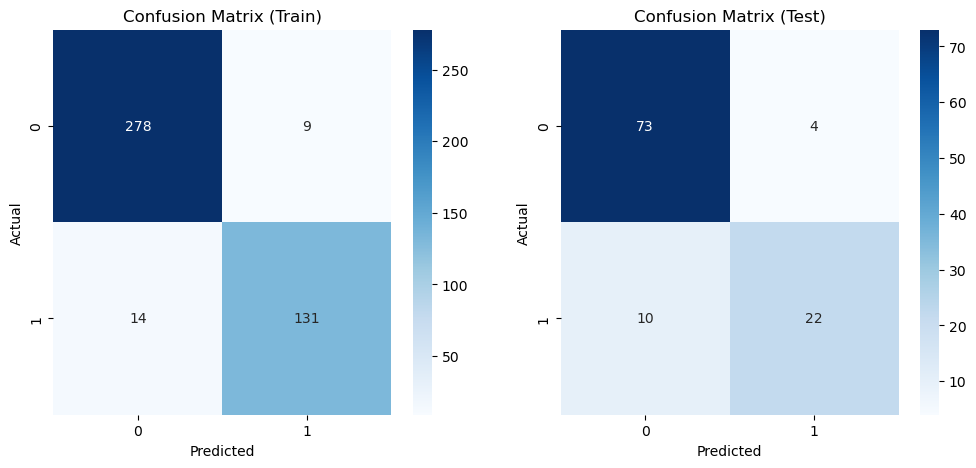

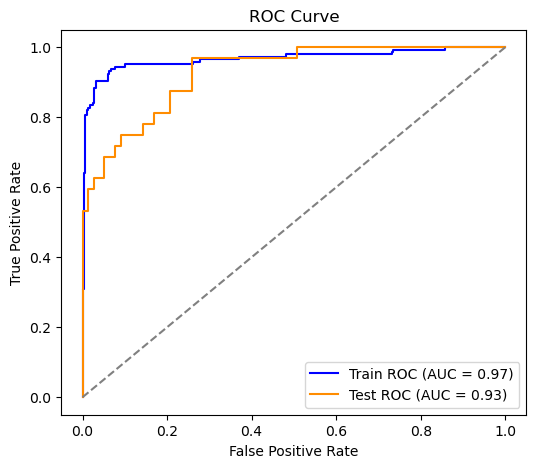

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Load the data
data = pd.read_excel('/Users/mehtap/Downloads/05.xlsx')

# Strip whitespaces from columns
data.columns = data.columns.str.strip()

# Convert all columns except 'PCOS' to numeric (handling '1.99.' -> '1.99')
def clean_numeric(x):
    if isinstance(x, str):
        x = x.strip().replace('.', '', 1) if x.count('.') > 1 else x
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

for col in data.columns:
    if col != 'PCOS':
        data[col] = data[col].apply(clean_numeric)

# Separate features and target
X_raw = data.drop(columns=['PCOS'])
y = data['PCOS']

# Imputation for missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_raw)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svm_classifier.predict(X_train_scaled)
y_test_pred = svm_classifier.predict(X_test_scaled)

# ROC-AUC on both train and test sets
y_train_proba = svm_classifier.predict_proba(X_train_scaled)[:, 1]
y_test_proba = svm_classifier.predict_proba(X_test_scaled)[:, 1]

roc_auc_train = roc_auc_score(y_train, y_train_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print("ROC AUC (Train):", roc_auc_train)
print("ROC AUC (Test):", roc_auc_test)

# Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_train), yticklabels=set(y_train), ax=axes[0])
axes[0].set_title('Confusion Matrix (Train)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[1])
axes[1].set_title('Confusion Matrix (Test)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# ROC Curve for Train and Test
plt.figure(figsize=(6, 5))
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = %0.2f)' % roc_auc_train, color='blue')
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = %0.2f)' % roc_auc_test, color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
